In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')


In [167]:
df = pd.read_csv("dfcar.csv")
#importing the file which we have extracted using selenium
pd.set_option('display.max_columns', None) # displays maximum columns
df

Brand                    Model  \
0               Toyota            Innova Crysta   
1                  BMW                 5 Series   
2              Renault                     KWID   
3              Renault                     KWID   
4                 Ford                     Ikon   
5              Hyundai                      i10   
6        Maruti Suzuki                  Celerio   
7              Hyundai                      i20   
8            Chevrolet                Sail U-VA   
9               Toyota               Etios Liva   
10            Mahindra                     Jeep   
11              Toyota                 Commuter   
12          Mitsubishi                   Pajero   
13       Maruti Suzuki                 Alto 800   
14              Toyota             Land Cruiser   
15                Jeep                  Compass   
16             Hyundai                    Verna   
17              Toyota                   Innova   
18                Ford                     Ikon   
19               Honda                     City   
20       Maruti Suzuki                    Swift   
21              Toyota            Innova Crysta   
22                Ford                     Ikon   
23       Maruti Suzuki                     Omni   
24              Toyota                   Innova   
25       Maruti Suzuki                      800   
26                Tata                     Nano   
27            Mahindra                     Thar   
28       Mercedes-Benz                  S-Class   
29       Mercedes-Benz              New C-Class   
30                Audi                       A6   
31                Tata                 Xenon XT   
32       Maruti Suzuki                  Wagon R   
33       Maruti Suzuki              Wagon R 1.0   
34       Maruti Suzuki                    Swift   
35             Hyundai                      EON   
36       Maruti Suzuki                     Alto   
37                Ford                   Fiesta   
38              Toyota                    Etios   
39                Tata                    Nexon   
40            Mahindra                     Jeep   
41                Audi                       Q7   
42       Maruti Suzuki                     Ritz   
43               Honda                     Brio   
44             Hyundai                      EON   
45          Volkswagen                    Jetta   
46              Toyota               Etios Liva   
47              Toyota                   Innova   
48       Maruti Suzuki                     Alto   
49       Maruti Suzuki                      800   
50             Hyundai                      i10   
51          Volkswagen                     Ameo   
52               Skoda                    Rapid   
53              Toyota            Corolla Altis   
54            Mahindra                   Bolero   
55    Hindustan Motors               Ambassador   
56       Maruti Suzuki                 Alto 800   
57       Maruti Suzuki                   Ertiga   
58               Honda                     City   
59       Maruti Suzuki                   Baleno   
60                Tata                    Nexon   
61       Maruti Suzuki                    Swift   
62       Maruti Suzuki                  Celerio   
63       Maruti Suzuki                      Zen   
64               Honda                     Jazz   
65                Ford                   Fiesta   
66              Toyota                   Qualis   
67       Maruti Suzuki                      800   
68       Maruti Suzuki                      800   
69       Maruti Suzuki                   Baleno   
70          Volkswagen                    Vento   
71                Ford                   Fiesta   
72             Hyundai                Grand i10   
73       Maruti Suzuki                  Wagon R   
74             Hyundai                    Verna   
75          Volkswagen                CrossPolo   
76             Renault                    Pulse   
77          Volkswagen                 

In [5]:
df.columns #columns names

Index(['Brand', 'Model', 'Variant', 'Manufacturig year', 'Kilometers driven',
       'Fuel', 'No of Owners', 'Location', 'Price'],
      dtype='object')

# Exploratory Data Analysis

In [168]:
print((df == '-').sum()) #checking null values.

Brand                0
Model                0
Variant              0
Manufacturig year    0
Kilometers driven    0
Fuel                 0
No of Owners         0
Location             0
Price                0
dtype: int64


In [169]:
df.isnull().sum() #checking null values.

Brand                0
Model                0
Variant              0
Manufacturig year    0
Kilometers driven    0
Fuel                 0
No of Owners         0
Location             0
Price                0
dtype: int64

In [170]:
df['Location'].nunique() 

1191

We can see that there are lot of unique values in the location column. Therefore to simplify it we can only take out the states instead of the whole address.

In [171]:
# new data frame with split value columns
df["State"] = df["Location"].str.split(",", expand = True)[2]

In [172]:
df.drop('Location',axis=1,inplace=True)

In [173]:
df.dtypes #checking data types

Brand                object
Model                object
Variant              object
Manufacturig year     int64
Kilometers driven    object
Fuel                 object
No of Owners         object
Price                object
State                object
dtype: object

We can see that kilometers driver and price is object type. We need to convert them into integers

Removing unnecessary things from the column values

In [174]:
df['Kilometers driven']=df['Kilometers driven'].apply(lambda x: x.replace(',',''))

In [175]:
df['Kilometers driven'] = df['Kilometers driven'].str.extract(r'(\d+[.\d]*)')

In [176]:
df['Price']=df['Price'].apply(lambda x: x.replace(',',''))

In [177]:
df['Price'] = df['Price'].str.extract(r'(\d+[.\d]*)')

In [178]:
df

Brand                    Model  \
0               Toyota            Innova Crysta   
1                  BMW                 5 Series   
2              Renault                     KWID   
3              Renault                     KWID   
4                 Ford                     Ikon   
5              Hyundai                      i10   
6        Maruti Suzuki                  Celerio   
7              Hyundai                      i20   
8            Chevrolet                Sail U-VA   
9               Toyota               Etios Liva   
10            Mahindra                     Jeep   
11              Toyota                 Commuter   
12          Mitsubishi                   Pajero   
13       Maruti Suzuki                 Alto 800   
14              Toyota             Land Cruiser   
15                Jeep                  Compass   
16             Hyundai                    Verna   
17              Toyota                   Innova   
18                Ford                     Ikon   
19               Honda                     City   
20       Maruti Suzuki                    Swift   
21              Toyota            Innova Crysta   
22                Ford                     Ikon   
23       Maruti Suzuki                     Omni   
24              Toyota                   Innova   
25       Maruti Suzuki                      800   
26                Tata                     Nano   
27            Mahindra                     Thar   
28       Mercedes-Benz                  S-Class   
29       Mercedes-Benz              New C-Class   
30                Audi                       A6   
31                Tata                 Xenon XT   
32       Maruti Suzuki                  Wagon R   
33       Maruti Suzuki              Wagon R 1.0   
34       Maruti Suzuki                    Swift   
35             Hyundai                      EON   
36       Maruti Suzuki                     Alto   
37                Ford                   Fiesta   
38              Toyota                    Etios   
39                Tata                    Nexon   
40            Mahindra                     Jeep   
41                Audi                       Q7   
42       Maruti Suzuki                     Ritz   
43               Honda                     Brio   
44             Hyundai                      EON   
45          Volkswagen                    Jetta   
46              Toyota               Etios Liva   
47              Toyota                   Innova   
48       Maruti Suzuki                     Alto   
49       Maruti Suzuki                      800   
50             Hyundai                      i10   
51          Volkswagen                     Ameo   
52               Skoda                    Rapid   
53              Toyota            Corolla Altis   
54            Mahindra                   Bolero   
55    Hindustan Motors               Ambassador   
56       Maruti Suzuki                 Alto 800   
57       Maruti Suzuki                   Ertiga   
58               Honda                     City   
59       Maruti Suzuki                   Baleno   
60                Tata                    Nexon   
61       Maruti Suzuki                    Swift   
62       Maruti Suzuki                  Celerio   
63       Maruti Suzuki                      Zen   
64               Honda                     Jazz   
65                Ford                   Fiesta   
66              Toyota                   Qualis   
67       Maruti Suzuki                      800   
68       Maruti Suzuki                      800   
69       Maruti Suzuki                   Baleno   
70          Volkswagen                    Vento   
71                Ford                   Fiesta   
72             Hyundai                Grand i10   
73       Maruti Suzuki                  Wagon R   
74             Hyundai                    Verna   
75          Volkswagen                CrossPolo   
76             Renault                    Pulse   
77          Volkswagen                 

In [179]:
df["Kilometers driven"] = pd.to_numeric(df["Kilometers driven"])

In [180]:
df["Price"] = pd.to_numeric(df["Price"])

In [181]:
df.dtypes

Brand                object
Model                object
Variant              object
Manufacturig year     int64
Kilometers driven     int64
Fuel                 object
No of Owners         object
Price                 int64
State                object
dtype: object

We have now converted kilometers driver and price into integers

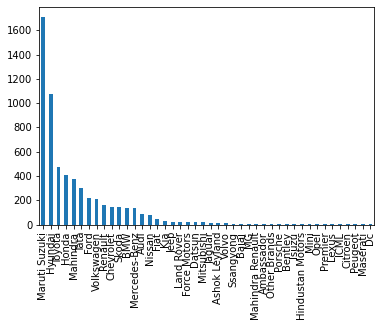

In [192]:
df['Brand'].value_counts().plot.bar()
plt.show()

We can see here that maximum of the people buy maruti suzuki brand cars

In [194]:
df['Model'].value_counts()

Swift                      288
Swift Dzire                183
Innova                     179
i10                        167
i20                        164
Wagon R                    152
City                       151
Polo                       122
XUV500                     119
Verna                      111
Santro Xing                105
Others                      97
Grand i10                   96
Creta                       94
Alto                        90
Ertiga                      84
Baleno                      84
Ecosport                    84
800                         77
Figo                        74
Scorpio                     72
Amaze                       71
Omni                        66
Vitara Brezza               64
Duster                      63
Fortuner                    62
Celerio                     61
Ritz                        61
KWID                        60
Vento                       60
Rapid                       59
Elite i20                   58
Innova C


we can see that maximum people buy maruti suzuki swift car.

In [195]:
df['Variant'].value_counts()

Others                                             340
VXI                                                138
VDI                                                114
LXI                                                105
LXi                                                 47
GLS                                                 41
Magna                                               33
2.5 V 7 STR                                         31
2011-2014 VDI                                       30
1.2 Kappa Magna                                     30
AC                                                  29
1.6 CRDi SX                                         29
VDi                                                 27
1.5 TDI Highline                                    27
LDI                                                 26
1.2 Spotz                                           24
Era                                                 23
LX                                                  23
Sportz    

Here others is highest which we cannot say and therefore is ambigous.

In [197]:
df['Variant'].nunique() #checking unique values

1924

We can see that there are many unique values in "Variant" Column, and also from the above point we can just drop this column as it won't be helpful.

In [198]:
df.drop('Variant',axis=1,inplace=True)

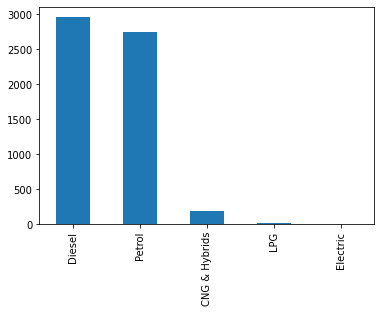

In [200]:
df['Fuel'].value_counts().plot.bar()
plt.show()

We can see that maximum people prefer to buy diesal cars.

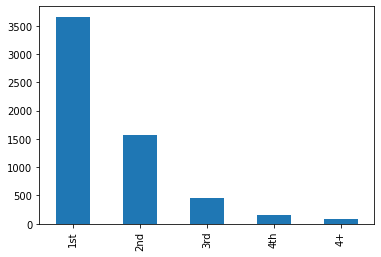

In [201]:
df['No of Owners'].value_counts().plot.bar()
plt.show()

We can see that maximum people buy car which was owned by only 1 person. Naturally this is because the lesser the owners owned before, better the condition of the car.

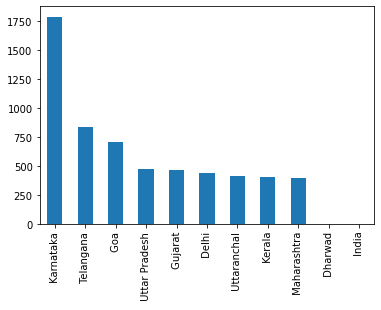

In [203]:
df['State'].value_counts().plot.bar()
plt.show()

We can see that maximum of the used cars are sold in Karnataka

# Data Preprocessing

In [204]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for i in ['Kilometers driven']:
    df[[i]]=scaler.fit_transform(df[[i]])


In [205]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in ['Brand','Model','Manufacturig year','Kilometers driven','Fuel','No of Owners','Price','State']:
    df[i]=label.fit_transform(df[i])

In [206]:
df.corr()

Brand     Model  Manufacturig year  Kilometers driven  \
Brand              1.000000  0.105976           0.030972           0.125512   
Model              0.105976  1.000000          -0.012140           0.079423   
Manufacturig year  0.030972 -0.012140           1.000000          -0.409764   
Kilometers driven  0.125512  0.079423          -0.409764           1.000000   
Fuel              -0.111909 -0.049528          -0.132295          -0.298181   
No of Owners       0.018655  0.000656          -0.483513           0.312665   
Price             -0.005285 -0.092153           0.601707          -0.219021   
State              0.008898  0.030636           0.018801          -0.005153   

                       Fuel  No of Owners     Price     State  
Brand             -0.111909      0.018655 -0.005285  0.008898  
Model             -0.049528      0.000656 -0.092153  0.030636  
Manufacturig year -0.132295     -0.483513  0.601707  0.018801  
Kilometers driven -0.298181      0.312665 -0.219021 -0.005153  
Fuel               1.000000      0.021271 -0.292093 -0.078379  
No of Owners       0.021271      1.000000 -0.338083 -0.034446  
Price             -0.292093     -0.338083  1.000000 -0.002741  
State             -0.078379     -0.034446 -0.002741  1.000000

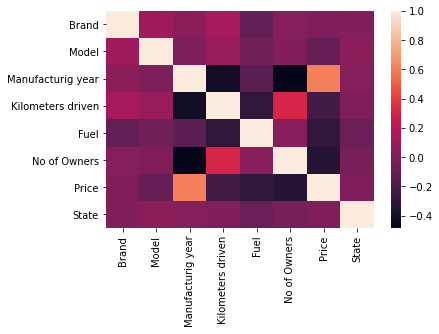

In [207]:
sns.heatmap(df.corr())
plt.show()
#Heat map of correlation between columns

We can see that there is no multicorralation.

# Splitting of data into Independent and Target variables

In [208]:
ind=df.drop("Price",axis=1)
tar=df["Price"]
#splitting individual and target variable in ind and tar

In [209]:
from sklearn.model_selection import train_test_split

# splitting data into training and testing 
ind_train, ind_test, tar_train, tar_test = train_test_split(ind, tar, test_size=0.33, random_state=42)

In [210]:
#Importing Machine learning Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

In [211]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
lr= LinearRegression()
xg = XGBRegressor()
ad = AdaBoostRegressor()


In [212]:
for m in [rf,lr,xg,ad,dt]:
    m.fit(ind_train,tar_train)
    train_predict = m.predict(ind_train)
    test_predict = m.predict(ind_test)
    print('for',m)
    print("RMSE of train:", np.sqrt(mean_squared_error(tar_train, train_predict)))
    print("RMSE of test:", np.sqrt(mean_squared_error(tar_test, test_predict)))
    print("Train R^2: ", r2_score(tar_train, train_predict))
    print("Test R^2: ", r2_score(tar_test, test_predict))
    print("..........\n")

for RandomForestRegressor()
RMSE of train: 27.113481739416102
RMSE of test: 75.53616411645457
Train R^2:  0.9762729958535608
Test R^2:  0.8221423234277269
..........

for LinearRegression()
RMSE of train: 133.22525711955115
RMSE of test: 136.38377789940435
Train R^2:  0.42714400897223004
Test R^2:  0.4201866719070394
..........

for XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
RMSE of train: 22.955064326872662
RMSE of test: 67.44702623489738
Train R^2:  0.98299293570

In [213]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             ind_train,
                             tar_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [214]:
for i in [rf,lr,xg,ad,dt]:
    print('for',i)
    print(get_cv_scores(i))


for RandomForestRegressor()
CV Mean:  0.8226862969021852
STD:  0.009232137204687978


None
for LinearRegression()
CV Mean:  0.42447176553805105
STD:  0.019002041821895507


None
for XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
CV Mean:  0.867971955780202
STD:  0.0071791614567836394


None
for AdaBoostRegressor(n_estimators=100, random_state=0)
CV Mean:  0.46670838955503874
STD:  0.022068279936120327


None
for DecisionTreeRegressor()
CV Mean:  0.6797734924948287
STD:

We can see that from the Accuracy score and Crossvalidation Score, XGBRegressor is performing the best. Therfore XGBRegressor is the best model

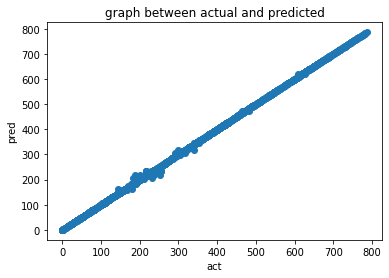

In [215]:
plt.scatter(tar_train, train_predict)
plt.title('graph between actual and predicted')
plt.xlabel('act')
plt.ylabel('pred')
plt.show()

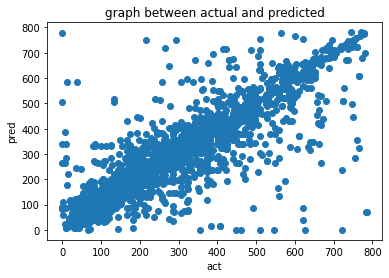

In [216]:
plt.scatter(tar_test, test_predict)
plt.title('graph between actual and predicted')
plt.xlabel('act')
plt.ylabel('pred')
plt.show()

We can see that the above two graphs that the model is predicting well.

# Hyperparameter Tuning

In [113]:
# To find the best parameters by using GridSearchCV to improve the model
from sklearn.model_selection import GridSearchCV

parameters = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  
              'subsample':[i/10.0 for i in range(6,11)],
            'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

gs=GridSearchCV(xg,parameters)
gs.fit(ind_train,tar_train)
print(gs.best_params_)
#best parameters

{'colsample_bytree': 1.0, 'gamma': 0.3, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 1.0}


In [114]:
gs.best_score_

0.8695142800886895

We can see that the score is good. Therefore the model is predicting well.